# Capstone - Dice Classifier EDA

Here we will source, clean, and prepare data prior to creating the model [model.ipynb](model.ipynb)

## Dependencies

### Install

In [24]:
#install packages

### Import

In [25]:
#import packages
from PIL import Image
import os
import matplotlib.pyplot as plt
from collections import Counter
import random
import shutil

## Data source

Source:
https://www.kaggle.com/datasets/ucffool/dice-d4-d6-d8-d10-d12-d20-images  

This dataset contains over 16,000 images of polyhedral dice that are 4-sided, 6-sided, 8-sided, 10-sided, 12-sided, and 20-sided which will serve as the classes for this project.  



Instead of keeping the train and validation split from the original dataset I combined them. Because of this in my [data](data) folder you will see only the classes ie d4, d6.  

## EDA

### Random sampling for quality checks

Here we can randomly select images for quality checks.

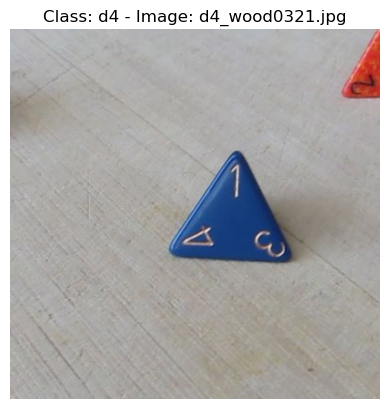

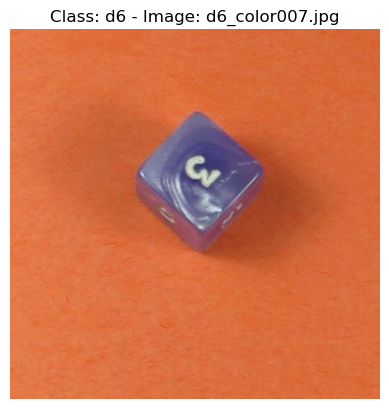

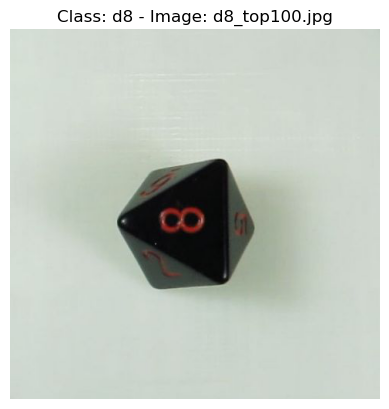

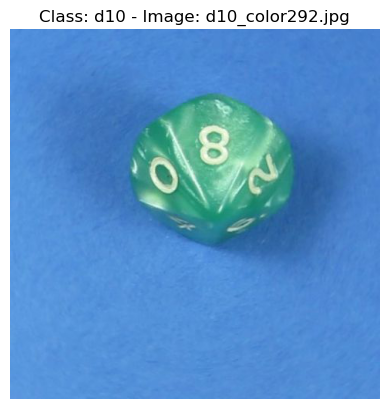

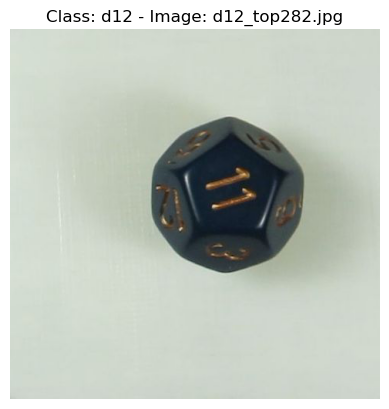

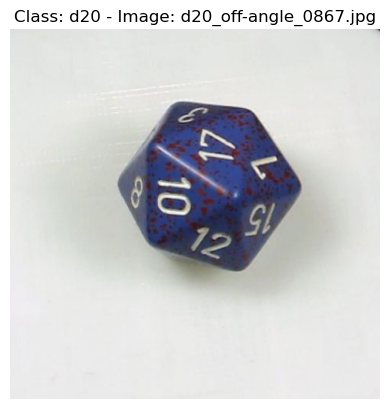

In [26]:

#create list of folder names
folder_list = ['d4', 'd6', 'd8', 'd10', 'd12', 'd20']

#number of images to display from each class
num_images_to_display = 1

#function to display random images from a folder
def display_random_images(folder_path, num_images):
    images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    #randomly sample from the images
    sampled_images = random.sample(images, min(num_images, len(images)))

    #display the sampled images
    for image_name in sampled_images:
        image_path = os.path.join(folder_path, image_name)
        with Image.open(image_path) as img:
            plt.imshow(img)
            plt.title(f'Class: {os.path.basename(folder_path)} - Image: {image_name}')
            plt.axis('off')
            plt.show()

#iterate through folders to display random images for each class
for folder in folder_list:
    #determine folder path dynamically
    folder_path = f'data/{folder}'

    #display random images for the current class
    display_random_images(folder_path, num_images_to_display)

Note that after many checks it appears the images are classified appropriately

### Image size distribution

Here we would like to see the size distribution of the images

In [27]:
#create list of folder names
folder_list = ['d4', 'd6', 'd8', 'd10', 'd12', 'd20']

#function to get image sizes from a folder
def get_image_sizes(folder_path):
    sizes = []

    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.gif')):
            image_path = os.path.join(folder_path, filename)
            with Image.open(image_path) as img:
                width, height = img.size
                sizes.append((width, height))

    return sizes

#iterate through folders to print image size distribution for each class
for folder in folder_list:
    #determine folder path dynamically
    folder_path = f'data/{folder}'

    #get image sizes for the current class
    sizes = get_image_sizes(folder_path)

    #count occurrences of each size
    size_counter = Counter(sizes)

    #print size and count information for each class
    print(f'Class: {folder}')
    print(f'{"Size":<10} {"Count":<10}')
    print('-' * 20)
    for size, count in size_counter.items():
        print(f'{size[0]}x{size[1]:<10} {count:<10}')
    print('\n')


Class: d4
Size       Count     
--------------------
480x480        2225      


Class: d6
Size       Count     
--------------------
480x480        4624      
1024x576        2         


Class: d8
Size       Count     
--------------------
480x480        1750      


Class: d10
Size       Count     
--------------------
480x480        1968      


Class: d12
Size       Count     
--------------------
480x480        1932      


Class: d20
Size       Count     
--------------------
480x480        3824      
548x717        1         
1024x576        1         
1024x766        2         
522x720        1         




Note that the vast majority of images are 480x480 pixels.  
Those that are not 480x480 pixels are going to be dropped in the preparation stage.

### Class count

Here we would like to see the count of records in each class

In class d4 the file count is: 2225
In class d6 the file count is: 4650
In class d8 the file count is: 1750
In class d10 the file count is: 1968
In class d12 the file count is: 1932
In class d20 the file count is: 3861


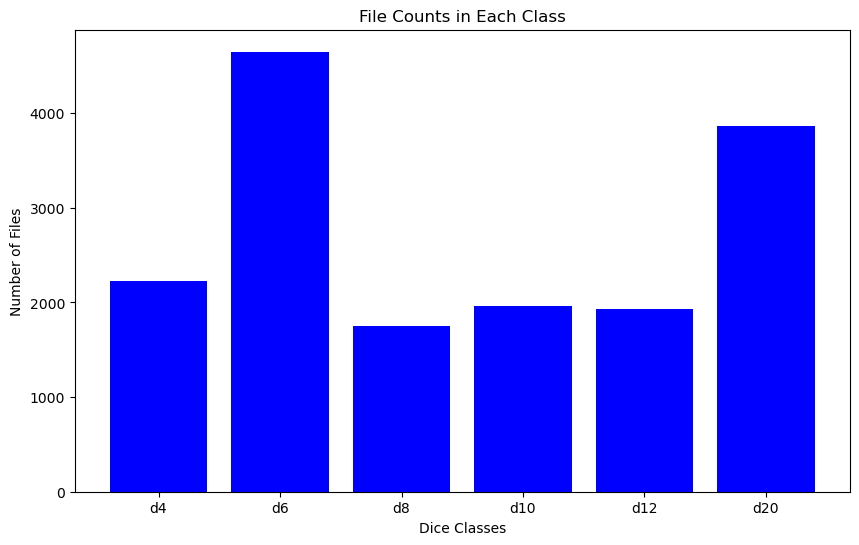

In [28]:
#determine count of each class

#create list of folder names
folder_list = ['d4', 'd6', 'd8', 'd10', 'd12', 'd20']

#initialize lists to store folder names and file counts
folders = []
file_counts = []

#iterate through folders to find number of files in each
for folder in folder_list:
    #determine folder name dynamically
    folder_path = f'data/{folder}'

    # List all files in the folder
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Get the count of files
    file_count = len(files)

    #print file counts
    print(f'In class {folder} the file count is: {file_count}')

    #store results
    folders.append(folder)
    file_counts.append(file_count)


#plot the results
plt.figure(figsize=(10, 6))
plt.bar(folders, file_counts, color='blue')
plt.title('File Counts in Each Class')
plt.xlabel('Dice Classes')
plt.ylabel('Number of Files')
plt.show()    

Note the imbalance in the classes.  
It is more desirable to have the same amount of images in each class.  
Because of this we will likely alter this later in the preparation section and beyond.

## Preparation

EDA findings that need addressed:
1. Image size outliers
2. Classes are imbalanced

### 2. Image size outliers

The vast majority of images are size 480x480 pixels so we are going to delete the outliers that do not fit this definition.

In [29]:
#remove image size outliers

#define the source and destination directories
source_base_dir = 'data'
filtered_base_dir = 'filtered_data'
target_size = (480, 480)

#create the filtered directory if it doesn't exist
if not os.path.exists(filtered_base_dir):
    os.makedirs(filtered_base_dir)

#create a list of classes
class_list = ['d4', 'd6', 'd8', 'd10', 'd12', 'd20']

#iterate through each class
for class_name in class_list:
    source_dir = os.path.join(source_base_dir, class_name)
    filtered_dir = os.path.join(filtered_base_dir, class_name)

    #create the filtered directory for the current class
    if not os.path.exists(filtered_dir):
        os.makedirs(filtered_dir)

    #list all files in the source directory
    files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

    #filter out images that are not 480x480 pixels
    for file_name in files:
        file_path = os.path.join(source_dir, file_name)
        with Image.open(file_path) as img:
            if img.size == target_size:
                filtered_path = os.path.join(filtered_dir, file_name)
                os.replace(file_path, filtered_path)

    #print a message indicating the completion of filtering for the current class
    print(f'Filtered images not of size {target_size} from class {class_name} and moved to {filtered_dir}')

Filtered images not of size (480, 480) from class d4 and moved to filtered_data/d4
Filtered images not of size (480, 480) from class d6 and moved to filtered_data/d6
Filtered images not of size (480, 480) from class d8 and moved to filtered_data/d8
Filtered images not of size (480, 480) from class d10 and moved to filtered_data/d10
Filtered images not of size (480, 480) from class d12 and moved to filtered_data/d12
Filtered images not of size (480, 480) from class d20 and moved to filtered_data/d20


### 1. Classes are imbalanced

Later during model creation we are going to use ImageDataGenerator to artificially create more images via rotating, zooming, flipping, etc.  

I want this to be done on even classes and feel there is enough data to bring each class down to the sample size of the lowest which is class d8 with 1750 images.

In [30]:

#clean class size imbalance

#set the target count for each class
target_count_per_class = 1750

#define the source and destination directories
source_base_dir = 'filtered_data'
destination_base_dir = 'clean_data'

#create the destination directory if it does not exist
if not os.path.exists(destination_base_dir):
    os.makedirs(destination_base_dir)

#create list of classes
class_list = ['d4', 'd6', 'd8', 'd10', 'd12', 'd20']

#iterate through each class
for class_name in class_list:
    source_dir = os.path.join(source_base_dir, class_name)
    destination_dir = os.path.join(destination_base_dir, class_name)

    #create the destination directory for the current class
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    #list all files in the source directory
    files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

    #randomly sample the required number of files
    sampled_files = random.sample(files, target_count_per_class)

    #move the sampled files to the destination directory
    for file_name in sampled_files:
        source_path = os.path.join(source_dir, file_name)
        destination_path = os.path.join(destination_dir, file_name)
        shutil.move(source_path, destination_path)

    #print a message indicating the completion of sampling for the current class
    print(f'Sampled {target_count_per_class} files from class {class_name} and moved to {destination_dir}')

Sampled 1750 files from class d4 and moved to clean_data/d4
Sampled 1750 files from class d6 and moved to clean_data/d6
Sampled 1750 files from class d8 and moved to clean_data/d8
Sampled 1750 files from class d10 and moved to clean_data/d10
Sampled 1750 files from class d12 and moved to clean_data/d12
Sampled 1750 files from class d20 and moved to clean_data/d20


## Split data for train/test/validation

We are aiming to do the typical 60%/20%/20% split for train/test/validation datasets respectively

In [33]:
#set the paths
input_data_dir = "clean_data"
output_data_dir = "split_data"

#define the split ratios
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

#iterate through each class (d{n})
for class_folder in os.listdir(input_data_dir):
    class_path = os.path.join(input_data_dir, class_folder)

    #create train, val, and test folders for each class
    train_path = os.path.join(output_data_dir, 'train', class_folder)
    val_path = os.path.join(output_data_dir, 'val', class_folder)
    test_path = os.path.join(output_data_dir, 'test', class_folder)

    os.makedirs(train_path, exist_ok=True)
    os.makedirs(val_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    #get the list of images in the class folder
    images = os.listdir(class_path)
    random.shuffle(images)

    #calculate the split indices
    train_split = int(train_ratio * len(images))
    val_split = int((train_ratio + val_ratio) * len(images))

    #copy images to the respective folders
    for i, image in enumerate(images):
        src_path = os.path.join(class_path, image)

        if i < train_split:
            dst_path = os.path.join(train_path, image)
        elif i < val_split:
            dst_path = os.path.join(val_path, image)
        else:
            dst_path = os.path.join(test_path, image)

        shutil.copy(src_path, dst_path)

#print the number of files in each split for each class
for split_folder in ['train', 'val', 'test']:
    print(f"\n{split_folder.capitalize()} split:")
    for class_folder in os.listdir(os.path.join(output_data_dir, split_folder)):
        class_path = os.path.join(output_data_dir, split_folder, class_folder)
        num_files = len(os.listdir(class_path))
        print(f"  {class_folder}: {num_files} files")



Train split:
  d12: 1050 files
  d4: 1050 files
  d10: 1050 files
  d20: 1050 files
  d8: 1050 files
  d6: 1050 files

Val split:
  d12: 350 files
  d4: 350 files
  d10: 350 files
  d20: 350 files
  d8: 350 files
  d6: 350 files

Test split:
  d12: 350 files
  d4: 350 files
  d10: 350 files
  d20: 350 files
  d8: 350 files
  d6: 350 files


## Delete Intermediate Data

We now have lots of duplicate data taking up space in our folder structure:  
data/  
filtered_data/  
clean_data/  
split_data/  

I am going to delete the filtered_data and clean_data directories to keep only the initial data and the split_data ready for consumption by the model

In [34]:
#paths to folders to delete
filtered_data_path = 'filtered_data'
clean_data_path = 'clean_data'

In [35]:
#function to delete a folder and its contents
def delete_folder(path):
    try:
        shutil.rmtree(path)
        print(f"Successfully deleted: {path}")
    except OSError as e:
        print(f"Error deleting {path}: {e}")

#delete the "filtered_data" folder
delete_folder(filtered_data_path)

#delete the "clean_data" folder
delete_folder(clean_data_path)

Successfully deleted: filtered_data
Successfully deleted: clean_data
